# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727036
Nama: Rio Raihan Despriatama
Kelas: 4-J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [14]:
# import package
import numpy as np
import pandas as pd

In [50]:
# baca data
data = pd.read_csv('Student Performance new.csv')
data.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


In [51]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math percentage              1000 non-null   float64
 6   reading score percentage     1000 non-null   float64
 7   writing score percentage     1000 non-null   float64
 8   sex                          1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


,Unnamed: 0,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.660890,0.691690,0.680540
std,288.819436,0.151631,0.146002,0.151957
min,0.000000,0.000000,0.170000,0.100000
25%,249.750000,0.570000,0.590000,0.577500
50%,499.500000,0.660000,0.700000,0.690000
75%,749.250000,0.770000,0.790000,0.790000
max,999.000000,1.000000,1.000000,1.000000


### Visualisasi Data

In [32]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

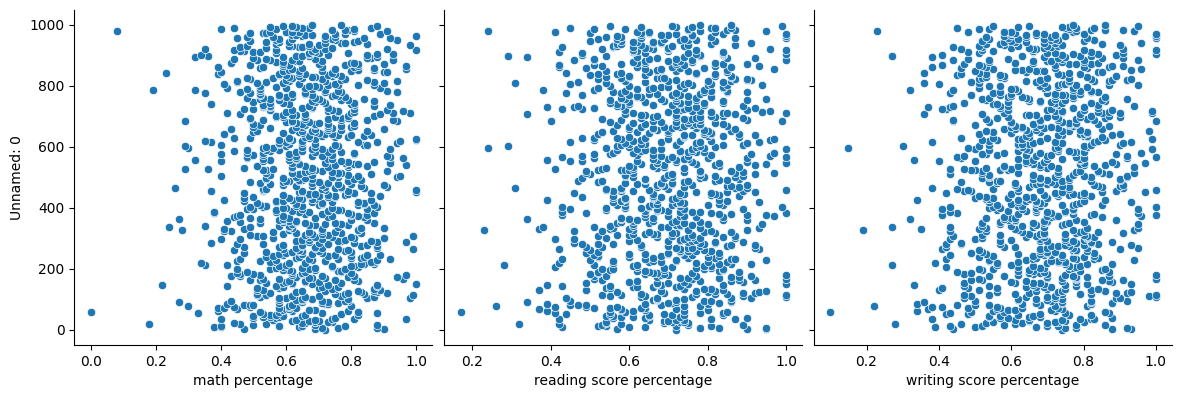

In [52]:
# operasi visualisasi
sns.pairplot(data, x_vars=['math percentage', 'reading score percentage','writing score percentage'], 
             y_vars='Unnamed: 0', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

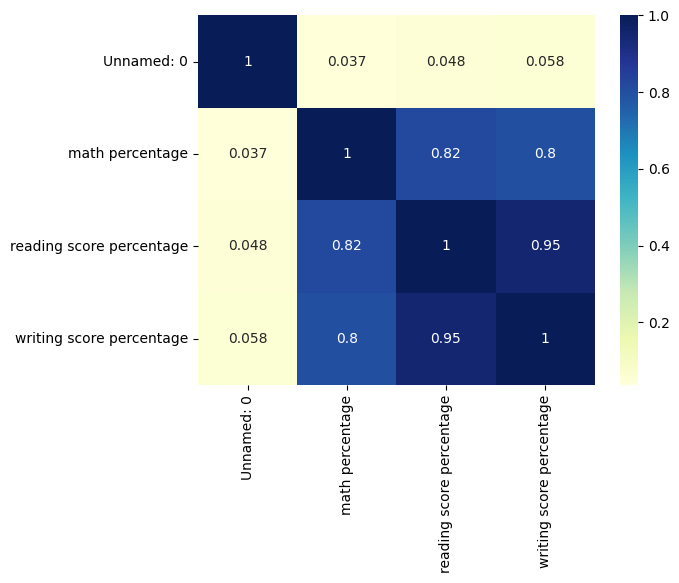

In [53]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [55]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['math percentage']
y = data['Unnamed: 0']

In [56]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [57]:
# hasil training dtaset
X_train
y_train

420    420
278    278
218    218
363    363
850    850
      ... 
855    855
871    871
835    835
792    792
520    520
Name: Unnamed: 0, Length: 700, dtype: int64

In [58]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [59]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const              446.744114
math percentage     96.299138
dtype: float64

In [60]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unnamed: 0   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.852
Date:                Wed, 21 Sep 2022   Prob (F-statistic):              0.174
Time:                        14:21:50   Log-Likelihood:                -4963.9
No. Observations:                 700   AIC:                             9932.
Df Residuals:                     698   BIC:                             9941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             446.7441     47.718      9.362      0.000     353.056     540.432
math percentage    96.2991     70.762      1.361      0.174     -42.632     235.230
==============================================================================
Omnibus:                      455.265   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.731
Skew:                          -0.046   Prob(JB):                     8.67e-10
Kurtosis:                       1.807   Cond. No.                         9.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

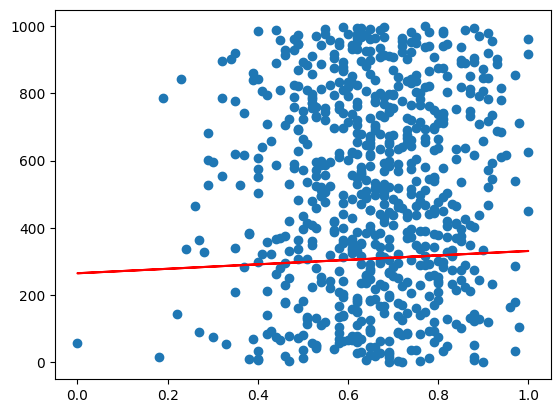

In [61]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [62]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

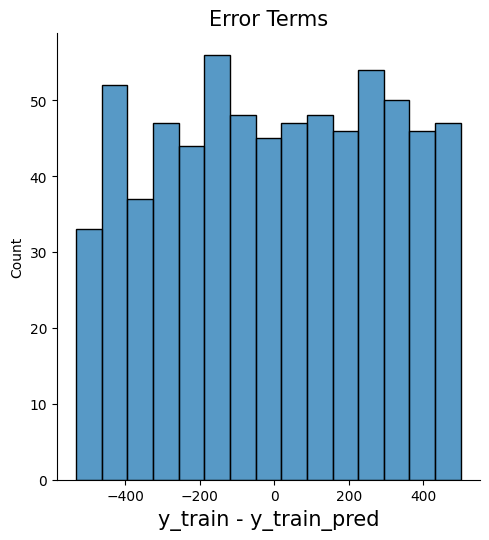

In [64]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

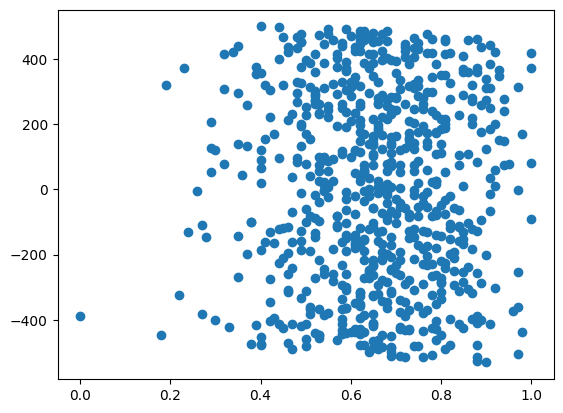

In [65]:
plt.scatter(X_train,res)
plt.show()

In [66]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

249    512.227528
353    491.041718
537    495.856675
424    486.226761
564    492.967700
dtype: float64

In [67]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.01819515320220222

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.273 sedangkan dari data testing adalah 0.200. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

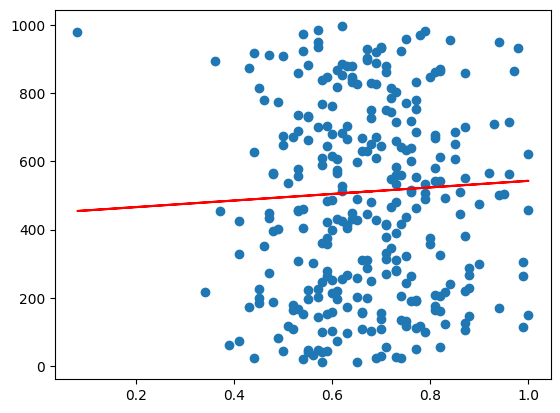

In [68]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()